**Data Collection from the Drive**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cp -r /content/drive/MyDrive/Datasets/Age_and_Gender_UTKFace_Dataset /content/

In [3]:
!unzip /content/Age_and_Gender_UTKFace_Dataset/Age_and_Gender_Classification_UTKFace.zip -d /content/Age_and_Gender_UTKFace_Dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Age_and_Gender_UTKFace_Dataset/utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: /content/Age_and_Gender_UTKFace_Dataset/utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: /content/Age_and_Gender_UTKFace_Dataset/utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: /content/Age_and_Gender_UTKFace_Dataset/utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: /content/Age_and_Gender_UTKFace_Dataset/utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: /content/Age_and_Gender_UTKFace_Dataset/utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: /content/Age_and_Gender_UTKFace_Dataset/utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: /content/Age_and_Gender_UTKFace_Dataset/

**Data Preprocessing**

In [4]:
#importing needed packages 
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
folder = "/content/Age_and_Gender_UTKFace_Dataset/UTKFace"
files = os.listdir(folder)
print(files)

['18_0_3_20170116221917954.jpg.chip.jpg', '32_1_2_20170116182311157.jpg.chip.jpg', '1_1_0_20170109192755957.jpg.chip.jpg', '72_1_0_20170110175340308.jpg.chip.jpg', '26_1_2_20170116180854138.jpg.chip.jpg', '26_1_1_20170113193242959.jpg.chip.jpg', '24_1_4_20170103223129750.jpg.chip.jpg', '39_1_1_20170116224149881.jpg.chip.jpg', '1_1_2_20161219222758263.jpg.chip.jpg', '54_0_0_20170113184055047.jpg.chip.jpg', '12_0_4_20170103200626630.jpg.chip.jpg', '10_0_0_20170110224416035.jpg.chip.jpg', '62_1_0_20170110180546671.jpg.chip.jpg', '85_1_0_20170110173744770.jpg.chip.jpg', '75_0_2_20170113174659450.jpg.chip.jpg', '27_1_0_20170103182420963.jpg.chip.jpg', '11_1_0_20170109203400684.jpg.chip.jpg', '29_0_2_20170116190029257.jpg.chip.jpg', '46_1_1_20170112220304903.jpg.chip.jpg', '17_0_0_20170105183615673.jpg.chip.jpg', '5_1_0_20170109194229104.jpg.chip.jpg', '26_0_1_20170113134739602.jpg.chip.jpg', '3_1_0_20170109192434126.jpg.chip.jpg', '58_0_4_20170104212345751.jpg.chip.jpg', '30_0_2_20170116165

In [6]:
ages = []
genders = []
images = []

for ind_files in files:
  age  = int(ind_files.split('_')[0])
  gender = int(int(ind_files.split('_')[1]))
  total = folder+'/'+ind_files
  #print(total)
  image = cv2.imread(total)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(48,48))
  images.append(image)
  ages.append(age)
  genders.append(gender)

print(ages)
print(genders)

[18, 32, 1, 72, 26, 26, 24, 39, 1, 54, 12, 10, 62, 85, 75, 27, 11, 29, 46, 17, 5, 26, 3, 58, 30, 6, 60, 40, 45, 53, 2, 1, 38, 68, 26, 35, 46, 8, 45, 21, 36, 27, 76, 63, 89, 29, 18, 36, 49, 8, 35, 74, 23, 24, 19, 26, 28, 45, 21, 8, 25, 47, 30, 50, 37, 25, 26, 32, 55, 25, 35, 29, 1, 68, 33, 40, 35, 32, 30, 8, 30, 29, 15, 28, 30, 45, 66, 24, 28, 31, 52, 42, 26, 26, 27, 34, 50, 2, 67, 11, 63, 35, 29, 53, 41, 26, 59, 85, 64, 22, 32, 26, 53, 60, 28, 55, 26, 26, 34, 14, 25, 1, 65, 30, 86, 49, 34, 58, 26, 45, 69, 23, 30, 13, 24, 26, 32, 33, 26, 35, 29, 48, 25, 26, 21, 12, 25, 23, 49, 37, 33, 17, 31, 16, 1, 22, 78, 26, 24, 72, 70, 24, 9, 32, 32, 73, 3, 50, 31, 65, 53, 47, 1, 26, 42, 22, 32, 25, 55, 26, 22, 61, 20, 32, 25, 24, 28, 35, 65, 12, 28, 10, 52, 85, 66, 25, 28, 35, 35, 48, 71, 57, 41, 26, 58, 29, 59, 35, 37, 8, 5, 26, 35, 99, 7, 57, 1, 20, 36, 2, 14, 8, 13, 10, 2, 59, 27, 1, 39, 28, 32, 40, 20, 30, 90, 69, 35, 38, 26, 26, 40, 23, 24, 5, 61, 24, 26, 28, 19, 100, 36, 30, 85, 26, 26, 43, 3

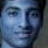

In [7]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[0])

In [8]:
#creating the labels (pairwise combination of age and gender)
labels = []

i = 0 
while i < len(ages):
  label = [[ages[i]],[genders[i]]]
  labels.append(label)
  i += 1

print(labels)

[[[18], [0]], [[32], [1]], [[1], [1]], [[72], [1]], [[26], [1]], [[26], [1]], [[24], [1]], [[39], [1]], [[1], [1]], [[54], [0]], [[12], [0]], [[10], [0]], [[62], [1]], [[85], [1]], [[75], [0]], [[27], [1]], [[11], [1]], [[29], [0]], [[46], [1]], [[17], [0]], [[5], [1]], [[26], [0]], [[3], [1]], [[58], [0]], [[30], [0]], [[6], [1]], [[60], [0]], [[40], [0]], [[45], [0]], [[53], [1]], [[2], [1]], [[1], [0]], [[38], [0]], [[68], [1]], [[26], [0]], [[35], [0]], [[46], [0]], [[8], [0]], [[45], [0]], [[21], [1]], [[36], [0]], [[27], [1]], [[76], [0]], [[63], [0]], [[89], [1]], [[29], [0]], [[18], [1]], [[36], [0]], [[49], [0]], [[8], [1]], [[35], [0]], [[74], [0]], [[23], [1]], [[24], [1]], [[19], [0]], [[26], [1]], [[28], [1]], [[45], [0]], [[21], [0]], [[8], [1]], [[25], [0]], [[47], [0]], [[30], [0]], [[50], [0]], [[37], [0]], [[25], [1]], [[26], [1]], [[32], [0]], [[55], [0]], [[25], [1]], [[35], [0]], [[29], [0]], [[1], [1]], [[68], [1]], [[33], [0]], [[40], [0]], [[35], [0]], [[32], [1

In [9]:
#we normalise the images and then create an array of labels and images
images_f = np.array(images)
labels_f = np.array(labels)
images_f_norm = images_f / 255
#print(labels_f)

**Train and Test Split**

In [10]:
#lets split the train and test sets where test set percentage is .25
X_train,X_test,Y_train,Y_test = train_test_split(images_f_norm,labels_f,test_size = 0.25)

In [11]:
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2 = [Y_test[:,1],Y_test[:,0]]

**Model Defenition**

In [12]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [13]:
#defining the Model

def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding ='same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

def model(input_shape):
  inputs = Input((input_shape))
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten()(maxp_4)
  dense_1= Dense(64,activation='relu')(flatten)
  dense_2= Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model

In [14]:
Model=model((48,48,3))

In [15]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

**Model Training**

In [16]:
#Model Training 
from tensorflow.keras.callbacks import ModelCheckpoint
model_save='Age_sex_detection.h5'
checkpointer = ModelCheckpoint(model_save, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [17]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=500,callbacks=[callback_list])

Epoch 1/500
278/278 [==============================] - ETA: 0s - loss: 16.8694 - sex_out_loss: 0.7008 - age_out_loss: 15.9914 - sex_out_accuracy: 0.5290 - age_out_accuracy: 0.0458
Epoch 1: val_loss improved from inf to 16.49911, saving model to Age_sex_detection.h5
278/278 [==============================] - 20s 22ms/step - loss: 16.8694 - sex_out_loss: 0.7008 - age_out_loss: 15.9914 - sex_out_accuracy: 0.5290 - age_out_accuracy: 0.0458 - val_loss: 16.4991 - val_sex_out_loss: 0.6842 - val_age_out_loss: 15.6571 - val_sex_out_accuracy: 0.5284 - val_age_out_accuracy: 0.0516
Epoch 2/500
278/278 [==============================] - ETA: 0s - loss: 13.2831 - sex_out_loss: 0.6357 - age_out_loss: 12.4500 - sex_out_accuracy: 0.6157 - age_out_accuracy: 0.0447
Epoch 2: val_loss improved from 16.49911 to 12.90228, saving model to Age_sex_detection.h5
278/278 [==============================] - 4s 15ms/step - loss: 13.2831 - sex_out_loss: 0.6357 - age_out_loss: 12.4500 - sex_out_accuracy: 0.6157 - age_

In [18]:
%cp -r  /content/Age_sex_detection.h5 /content/drive/MyDrive/Datasets/Age_and_Gender_UTKFace_Dataset/

**Model Evaluation**

In [19]:
#Model Evaluation
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 1s 5ms/step - loss: 7.4406 - sex_out_loss: 0.2635 - age_out_loss: 6.4335 - sex_out_accuracy: 0.8826 - age_out_accuracy: 0.0516


[7.4405717849731445,
 0.26353397965431213,
 6.433548450469971,
 0.882571280002594,
 0.05162814259529114]

In [20]:
pred=Model.predict(X_test)
pred[1]

array([[26.093576],
       [64.565834],
       [20.310019],
       ...,
       [17.256008],
       [39.62887 ],
       [28.145521]], dtype=float32)

In [21]:
pred[0]

array([[0.83905554],
       [0.8305302 ],
       [0.9636492 ],
       ...,
       [0.9689626 ],
       [0.73060226],
       [0.99820745]], dtype=float32)

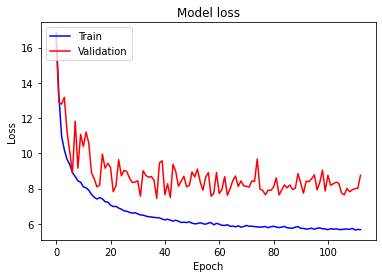

In [25]:
import matplotlib.pyplot as plt
#Loss
plt.plot(History.history['loss'],color = 'blue')
plt.plot(History.history['val_loss'], color = 'red')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

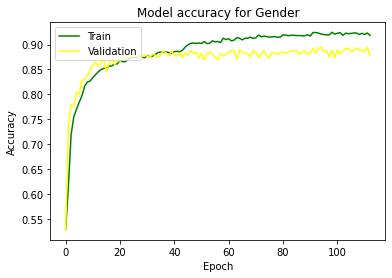

In [30]:
#accuracy for gender
plt.plot(History.history['sex_out_accuracy'], color = 'green')
plt.plot(History.history['val_sex_out_accuracy'], color = 'yellow')
plt.title('Model accuracy for Gender')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

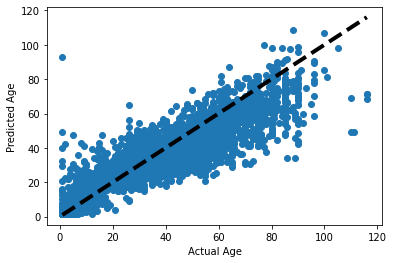

In [34]:
#accuracy for age
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
i=0
Pred_l=[]
while(i<len(pred[0])):
  Pred_l.append(int(np.round(pred[0][i])))
  i+=1 
report=classification_report(Y_test_2[0], Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3118
           1       0.87      0.88      0.88      2809

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



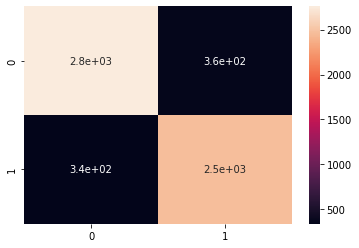

In [36]:
import seaborn as sns
results = confusion_matrix(Y_test_2[0], Pred_l)
sns.heatmap(results, annot=True)

**Testing the Model**

In [44]:
#testing the model
def test_image(ind,images_f,images_f_2,labels_f,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ str(age))
  print("Predicted Sex: "+ sex_f[sex])
  print("Actual Age: "+ str(int(labels_f[ind][0])))
  print("Actual Sex: "+ str(sex_f[int(labels_f[ind][1])]))

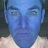

Predicted Age: 41
Predicted Sex: Male
Actual Age: 45
Actual Sex: Male


In [45]:
test_image(57,images_f,images_f_norm,labels_f,Model)

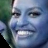

Predicted Age: 30
Predicted Sex: Female
Actual Age: 33
Actual Sex: Female


In [46]:
test_image(137,images_f,images_f_norm,labels_f,Model)

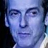

Predicted Age: 39
Predicted Sex: Male
Actual Age: 36
Actual Sex: Male


In [49]:
test_image(503,images_f,images_f_norm,labels_f,Model)

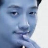

Predicted Age: 22
Predicted Sex: Male
Actual Age: 30
Actual Sex: Male


In [48]:
test_image(24,images_f,images_f_norm,labels_f,Model)